In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
from scipy import stats

import glob as glob
import os as os
import six

import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import pickle as pkl

sns.set_color_codes()
sns.set_palette("hls")  

from scipy.stats import spearmanr

import matplotlib.gridspec as gridspec

sns.set_style("white")
sns.set_context(rc = {'patch.linewidth': 0.0})

In [2]:
gray = '#0075b0'
mov_grat= '#f32974'
pix_noise = '#ff7047'
stat_grat = '#869fdc'

gray_100 = '#004264'
gray_75 = '#0075b0'
gray_50 = '#00a8fd'

mov_grat_50 = '#f771a3'
mov_grat_75 = '#f32974'
mov_grat_100 = '#c40b50'

In [3]:
#data for Figure 2
Tm3_data_Fig2 = pd.read_pickle("Tm3_Fig2.pkl")

#data for Figure 3
Mi1_data_Fig3 = pd.read_pickle("Mi1_Fig3.pkl")
Tm1_data_Fig3 = pd.read_pickle("Tm1_Fig3.pkl")
Tm2_data_Fig3 = pd.read_pickle("Tm2_Fig3.pkl")
Tm3_data_Fig3 = pd.read_pickle("Tm3_Fig3.pkl")

#data for Figure 5
Mi1_data_Fig5 = pd.read_pickle("Mi1_Fig5.pkl")
Tm3_data_Fig5 = pd.read_pickle("Tm3_Fig5.pkl")

#data for Figure S1
Mi1_data_FigS1 = pd.read_pickle("Mi1_FigS1.pkl")

#data for Figure S2
L1_data_FigS2 = pd.read_pickle("L1_FigS2.pkl")

/Users/pirogova/opt/anaconda3/envs/myenv_python2/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


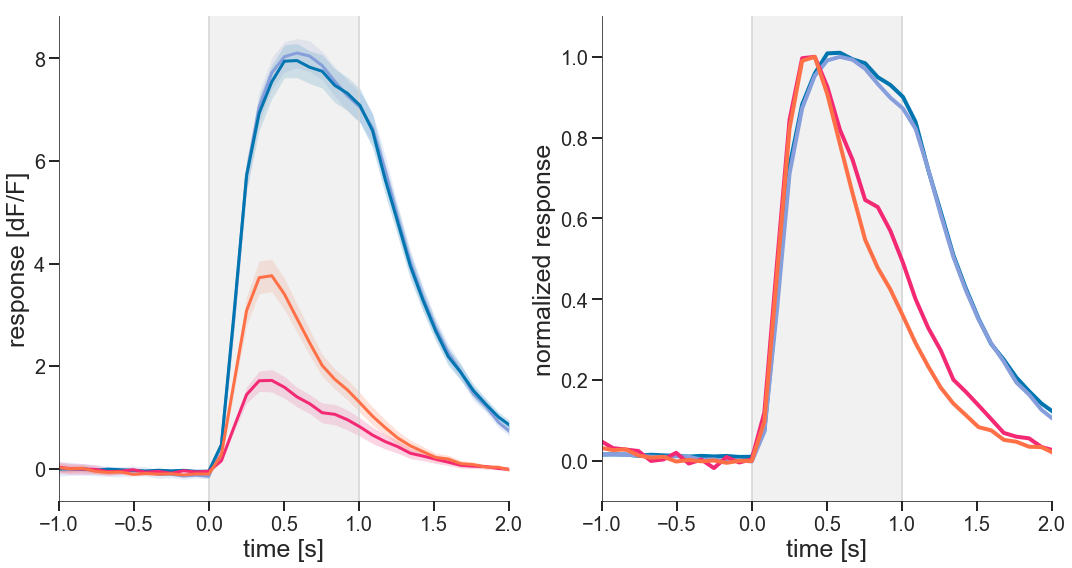

In [4]:
#for Figure 2
data = Tm3_data_Fig2

#for Figure S1
#data = Mi1_data_FigS1


fig = plt.figure(figsize = (15,8))
gs1 = gridspec.GridSpec(1, 2)

with sns.axes_style('white'):
    ax1 = plt.subplot(gs1[0,0])
    ax2 = plt.subplot(gs1[0,1])

ci = 68

#windows for baseline
normalise_before = [-1,-.9]
normalise_start = [-0.1,0]

offset = 0.01
    
time = np.sort(data.index.get_level_values('time').unique())
time = time[(time>-3.)&(time<3.4)] 

ax1.axvline(0, color = 'lightgrey')
ax1.axvline(1, color = 'lightgrey')
    
sns.tsplot(ax = ax1, time = time,
          data = (data.xs(( 1.,  "stat_grat, 100%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs(( 1.,  "stat_grat, 100%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean()).values.T,linewidth = 3, color = stat_grat, err_style = 'ci_band', ci = ci, alpha = 1.0)
sns.tsplot(ax = ax1, time = time,
          data = (data.xs(( 1.,  "gray, 100%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs(( 1.,  "gray, 100%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean()).values.T,linewidth = 3, color = gray, err_style = 'ci_band', ci = ci, alpha = 1.0)
sns.tsplot(ax = ax1, time = time,
          data = (data.xs(( 1.,  "mov_grat, 100%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs(( 1.,  "mov_grat, 100%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean()).values.T,linewidth = 3, color = mov_grat, err_style = 'ci_band', ci = ci, alpha = 1.0)
sns.tsplot(ax = ax1, time = time,
          data = (data.xs(( 1.,  "pix_noise, 100%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs(( 1.,  "pix_noise, 100%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean()).values.T,linewidth = 3, color = pix_noise, err_style = 'ci_band', ci = ci, alpha = 1.0)

ax1.axvspan(0, 1, color='lightgrey', alpha = 0.3)
ax1.set_xlim(-1, 2)
#ax1.set_ylim(-2, 13.01) #Mi1
#ax1.set_ylim(-2, 9.01) #Tm3
ax1.set_ylabel('response [dF/F]', fontsize = 25)
ax1.set_xlabel('time [s]', fontsize = 25)
ax1.tick_params(axis="x", labelsize=20)
ax1.tick_params(axis="y", labelsize=20)
ax1.tick_params(direction='out', length=10, width=2)
ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()
sns.despine(ax = ax1)


ax2.axvline(0, color = 'lightgrey')
ax2.axvline(1, color = 'lightgrey')

ax2.plot(time, offset + (data.xs(( 1.,"gray, 100%"), level = ( "step_dts", 'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs((  1., "gray, 100%"), level = ( "step_dts", 'velocities')).dropna(1, how = "all")[normalise_start[0]:normalise_start[1]].mean(1).mean()).divide(data.xs(( 1., "gray, 100%"), level = ( "step_dts", 'velocities')).dropna(1, how = "all")[time[0]:time[-1]].mean(1).max()-data.xs((  1., "gray, 100%"), level = ( "step_dts", 'velocities')).dropna(1, how = "all")[normalise_start[0]:normalise_start[1]].mean(1).mean()).mean(1), color = gray, linewidth = 4, alpha = 1)
ax2.plot(time, (data.xs(( 1.,"stat_grat, 100%"), level = ( "step_dts", 'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs((  1., "stat_grat, 100%"), level = ( "step_dts", 'velocities')).dropna(1, how = "all")[normalise_start[0]:normalise_start[1]].mean(1).mean()).divide(data.xs(( 1., "stat_grat, 100%"), level = ( "step_dts", 'velocities')).dropna(1, how = "all")[time[0]:time[-1]].mean(1).max()-data.xs((  1., "stat_grat, 100%"), level = ( "step_dts", 'velocities')).dropna(1, how = "all")[normalise_start[0]:normalise_start[1]].mean(1).mean()).mean(1), color = stat_grat, linewidth = 4, alpha = 1)
ax2.plot(time, (data.xs(( 1.,"mov_grat, 100%"), level = ( "step_dts", 'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs((  1., "mov_grat, 100%"), level = ( "step_dts", 'velocities')).dropna(1, how = "all")[normalise_start[0]:normalise_start[1]].mean(1).mean()).divide(data.xs(( 1., "mov_grat, 100%"), level = ( "step_dts", 'velocities')).dropna(1, how = "all")[time[0]:time[-1]].mean(1).max()-data.xs((  1., "mov_grat, 100%"), level = ( "step_dts", 'velocities')).dropna(1, how = "all")[normalise_start[0]:normalise_start[1]].mean(1).mean()).mean(1), color = mov_grat, linewidth = 4, alpha = 1)
ax2.plot(time, (data.xs(( 1.,"pix_noise, 100%"), level = ( "step_dts", 'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs((  1., "pix_noise, 100%"), level = ( "step_dts", 'velocities')).dropna(1, how = "all")[normalise_start[0]:normalise_start[1]].mean(1).mean()).divide(data.xs(( 1., "pix_noise, 100%"), level = ( "step_dts", 'velocities')).dropna(1, how = "all")[time[0]:time[-1]].mean(1).max()-data.xs((  1., "pix_noise, 100%"), level = ( "step_dts", 'velocities')).dropna(1, how = "all")[normalise_start[0]:normalise_start[1]].mean(1).mean()).mean(1), color = pix_noise, linewidth = 4, alpha = 1)

ax2.axvspan(0, 1, color='lightgrey', alpha = 0.3)
ax2.set_xlim(-1, 2)
ax2.set_ylim(-.1, 1.1)
ax2.set_ylabel('normalized response', fontsize = 25)
ax2.tick_params(axis="x", labelsize=20)
ax2.tick_params(axis="y", labelsize=20)
ax2.set_xlabel('time [s]', fontsize = 25)
sns.despine(ax = ax2)

ax2.tick_params(direction='out', length=10, width=2)
ax2.xaxis.tick_bottom()
ax2.yaxis.tick_left()

plt.tight_layout()

/Users/pirogova/opt/anaconda3/envs/myenv_python2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


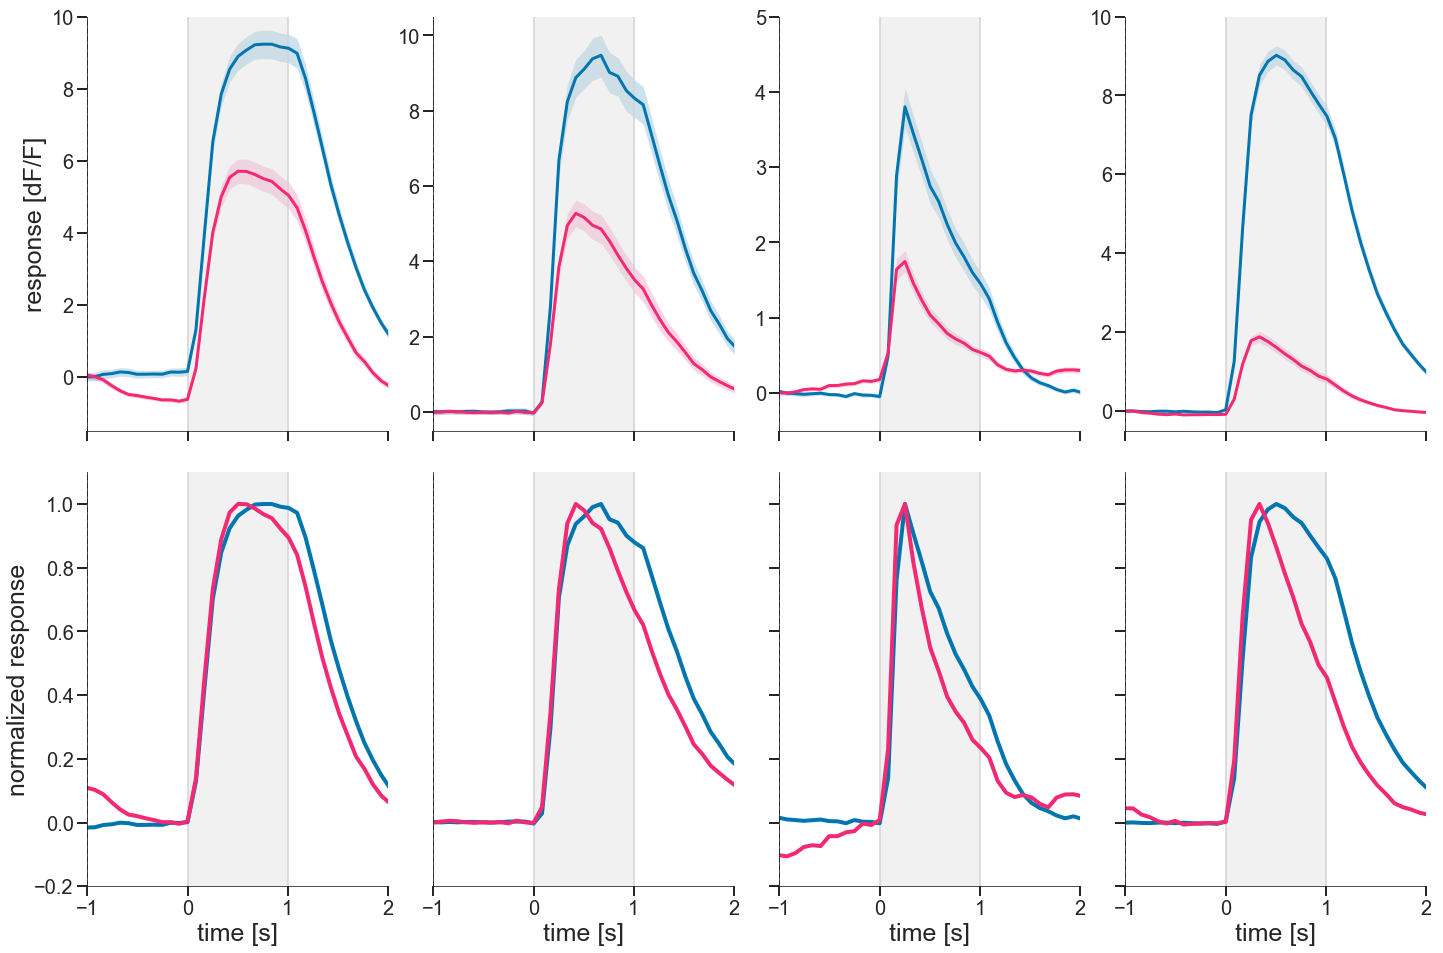

In [5]:
#for Figure 3

fig = plt.figure(figsize = (24,16))
gs1 = gridspec.GridSpec(2,4, wspace = 0.15, hspace = 0.1)

with sns.axes_style('white'):
    ax1 = plt.subplot(gs1[0,0]) #Mi1
    ax2 = plt.subplot(gs1[1,0])
    ax3 = plt.subplot(gs1[0,1]) #Tm1
    ax4 = plt.subplot(gs1[1,1])
    ax5 = plt.subplot(gs1[0,3]) #Tm3
    ax6 = plt.subplot(gs1[1,3])
    ax7 = plt.subplot(gs1[0,2]) #Tm2
    ax8 = plt.subplot(gs1[1,2])

ci = 68

#windows for baseline
normalise_before = [-1,-.9]
normalise_start = [-0.1,0]

data = Mi1_data_Fig3
        
time = np.sort(data.loc[1].index.get_level_values('time').unique())
time = time[(time>-3.)&(time<3.4)]

ax1.axvline(0, color = 'lightgrey')
ax1.axvline(1, color = 'lightgrey')

sns.tsplot(ax = ax1, time = time,
          data = (data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[time[0]:time[-1]]-data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[normalise_before[0]: normalise_before[1]].mean(1).mean()).values.T, linewidth = 3, color = gray, err_style = 'ci_band', ci = ci, alpha = 1.0)
sns.tsplot(ax = ax1, time = time,
          data = (data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[time[0]:time[-1]]-data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[normalise_before[0]: normalise_before[1]].mean(1).mean()).values.T,linewidth = 3, color = mov_grat, err_style = 'ci_band', ci = ci, alpha = 1.0, condition = "moving background")

ax1.axvspan(0, 1, color='lightgrey', alpha = 0.3)
ax1.axvline(-1, color = 'black', linestyle = '--')
ax1.axvline(2.5,color = 'black', linestyle = '--')
ax1.set_xlim(-1, 2)
ax1.set_ylim(-1.5, 10)
ax1.set_ylabel('response [dF/F]', fontsize = 25)
ax1.set_xlabel('')
ax1.tick_params(axis="x", labelsize=20)
ax1.tick_params(axis="y", labelsize=20)
ax1.get_legend().remove()
ax1.tick_params(direction='out', length=10, width=2)
ax1.set_xticklabels(["","",""], fontsize = 18)
ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()
sns.despine(ax = ax1)


ax2.axvline(0, color = 'lightgrey')
ax2.axvline(1, color = 'lightgrey')

ax2.plot(time, (data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[time[0]:time[-1]]-data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).divide(data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).mean(1), color = gray, linewidth = 4, alpha = 1.0)
ax2.plot(time, (data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[time[0]:time[-1]]-data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).divide(data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).mean(1), color = mov_grat, linewidth = 4, alpha = 1.0)

ax2.axvspan(0, 1, color='lightgrey', alpha = 0.3)
ax2.axvline(-1, color = 'black', linestyle = '--')
ax2.axvline(2.5,color = 'black', linestyle = '--')
ax2.set_xlim(-1, 2)
ax2.set_ylim(-.2, 1.1)
sns.despine(ax = ax2)
ax2.set_ylabel('normalized response', fontsize = 25)
ax2.tick_params(axis="x", labelsize=20)
ax2.tick_params(axis="y", labelsize=20)
ax2.set_xlabel('time [s]', fontsize = 25)
ax2.tick_params(direction='out', length=10, width=2)
ax2.xaxis.tick_bottom()
ax2.yaxis.tick_left()



data = Tm2_data_Fig3

ax7.axvline(0, color = 'lightgrey')
ax7.axvline(1, color = 'lightgrey')
    
sns.tsplot(ax = ax7, time = time,
          data = (data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[time[0]:time[-1]]-data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[normalise_before[0]: normalise_before[1]].mean(1).mean()).values.T, linewidth = 3, color = gray, err_style = 'ci_band', ci = ci, alpha = 1.0)
sns.tsplot(ax = ax7, time = time,
          data = (data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[time[0]:time[-1]]-data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[normalise_before[0]: normalise_before[1]].mean(1).mean()).values.T,linewidth = 3, color = mov_grat, err_style = 'ci_band', ci = ci, alpha = 1.0, condition = "moving background")

ax7.axvspan(0, 1, color='lightgrey', alpha = 0.3)
ax7.axvline(-1, color = 'black', linestyle = '--')
ax7.axvline(2.5,color = 'black', linestyle = '--')
ax7.set_xlim(-1, 2)
ax7.set_ylim(-.5, 5)
ax7.set_xlabel('')
ax7.tick_params(axis="x", labelsize=20)
ax7.tick_params(axis="y", labelsize=20)
ax7.get_legend().remove()
ax7.tick_params(direction='out', length=10, width=2)
ax7.set_xticklabels(["","",""], fontsize = 18)
ax7.xaxis.tick_bottom()
ax7.yaxis.tick_left()
sns.despine(ax = ax7)


ax8.axvline(0, color = 'lightgrey')
ax8.axvline(1, color = 'lightgrey')

ax8.plot(time, (data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[time[0]:time[-1]]-data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).divide(data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).mean(1), color = gray, linewidth = 4, alpha = 1.0)
ax8.plot(time, (data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[time[0]:time[-1]]-data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).divide(data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).mean(1), color = mov_grat, linewidth = 4, alpha = 1.0)

ax8.axvspan(0, 1, color='lightgrey', alpha = 0.3)
ax8.axvline(-1, color = 'black', linestyle = '--')
ax8.axvline(2.5,color = 'black', linestyle = '--')
ax8.set_xlim(-1, 2)
ax8.set_ylim(-.2, 1.1)
sns.despine(ax = ax8)
ax8.tick_params(axis="x", labelsize=20)
ax8.tick_params(axis="y", labelsize=20)
ax8.set_xlabel('time [s]', fontsize = 25)
ax8.tick_params(direction='out', length=10, width=2)
ax8.set_yticklabels(["","",""], fontsize = 18)
ax8.xaxis.tick_bottom()
ax8.yaxis.tick_left()



data = Tm1_data_Fig3

ax3.axvline(0, color = 'lightgrey')
ax3.axvline(1, color = 'lightgrey')
    
sns.tsplot(ax = ax3, time = time,
          data = (data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[time[0]:time[-1]]-data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[normalise_before[0]: normalise_before[1]].mean(1).mean()).values.T, linewidth = 3, color = gray, err_style = 'ci_band', ci = ci, alpha = 1.0)
sns.tsplot(ax = ax3, time = time,
          data = (data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[time[0]:time[-1]]-data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[normalise_before[0]: normalise_before[1]].mean(1).mean()).values.T,linewidth = 3, color = mov_grat, err_style = 'ci_band', ci = ci, alpha = 1.0, condition = "moving background")

ax3.axvspan(0, 1, color='lightgrey', alpha = 0.3)
ax3.axvline(-1, color = 'black', linestyle = '--')
ax3.axvline(2.5,color = 'black', linestyle = '--')
ax3.set_xlim(-1, 2)
ax3.set_ylim(-.5, 10.5)
ax3.tick_params(axis="x", labelsize=20)
ax3.tick_params(axis="y", labelsize=20)
ax3.get_legend().remove()
ax3.tick_params(direction='out', length=10, width=2)
ax3.set_xticklabels(["","",""], fontsize = 18)
ax3.xaxis.tick_bottom()
ax3.yaxis.tick_left()
sns.despine(ax = ax3)


ax4.axvline(0, color = 'lightgrey')
ax4.axvline(1, color = 'lightgrey')

ax4.plot(time, (data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[time[0]:time[-1]]-data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).divide(data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).mean(1), color = gray, linewidth = 4, alpha = 1.0)
ax4.plot(time, (data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[time[0]:time[-1]]-data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).divide(data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).mean(1), color = mov_grat, linewidth = 4, alpha = 1.0)

ax4.axvspan(0, 1, color='lightgrey', alpha = 0.3)
ax4.axvline(-1, color = 'black', linestyle = '--')
ax4.axvline(2.5,color = 'black', linestyle = '--')
ax4.set_xlim(-1, 2)
ax4.set_ylim(-.2, 1.1)
sns.despine(ax = ax4)
ax4.tick_params(axis="x", labelsize=20)
ax4.tick_params(axis="y", labelsize=20)
ax4.set_yticks([])
ax4.set_xlabel('time [s]', fontsize = 25)
ax4.tick_params(direction='out', length=10, width=2)
ax4.xaxis.tick_bottom()
ax4.yaxis.tick_left()



data = Tm3_data_Fig3

ax5.axvline(0, color = 'lightgrey')
ax5.axvline(1, color = 'lightgrey')

sns.tsplot(ax = ax5, time = time,
          data = (data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[time[0]:time[-1]]-data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[normalise_before[0]: normalise_before[1]].mean(1).mean()).values.T, linewidth = 3, color = gray, err_style = 'ci_band', ci = ci, alpha = 1.0)
sns.tsplot(ax = ax5, time = time,
          data = (data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[time[0]:time[-1]]-data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[normalise_before[0]: normalise_before[1]].mean(1).mean()).values.T,linewidth = 3, color = mov_grat, err_style = 'ci_band', ci = ci, alpha = 1.0, condition = "moving background")

ax5.axvspan(0, 1, color='lightgrey', alpha = 0.3)
ax5.axvline(-1, color = 'black', linestyle = '--')
ax5.axvline(2.5,color = 'black', linestyle = '--')
ax5.set_xlim(-1, 2)
ax5.set_ylim(-.5, 10)
ax5.set_xticklabels(["","",""], fontsize = 18)
ax5.tick_params(axis="x", labelsize=20)
ax5.tick_params(axis="y", labelsize=20)
ax5.get_legend().remove()
ax5.tick_params(direction='out', length=10, width=2)
ax5.xaxis.tick_bottom()
ax5.yaxis.tick_left()
sns.despine(ax = ax5)

time = np.sort(data.index.get_level_values('time').unique())
time = time[(time>-3.)&(time<3.4)]

ax6.axvline(0, color = 'lightgrey')
ax6.axvline(1, color = 'lightgrey')

ax6.plot(time, (data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[time[0]:time[-1]]-data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).divide(data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).mean(1), color = gray, linewidth = 4, alpha = 1.0)
ax6.plot(time, (data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[time[0]:time[-1]]-data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).divide(data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).mean(1), color = mov_grat, linewidth = 4, alpha = 1.0)

ax6.axvspan(0, 1, color='lightgrey', alpha = 0.3)
ax6.axvline(-1, color = 'black', linestyle = '--')
ax6.axvline(2.5,color = 'black', linestyle = '--')
ax6.set_xlim(-1, 2)
ax6.set_ylim(-.2, 1.1)
ax6.set_xlabel('time [s]', fontsize = 25)
ax6.tick_params(axis="x", labelsize=20)
ax6.tick_params(axis="y", labelsize=20)
ax6.set_yticklabels(["","",""], fontsize = 18)
ax6.tick_params(direction='out', length=10, width=2)
sns.despine(ax = ax6)
ax6.xaxis.tick_bottom()
ax6.yaxis.tick_left()

plt.tight_layout()

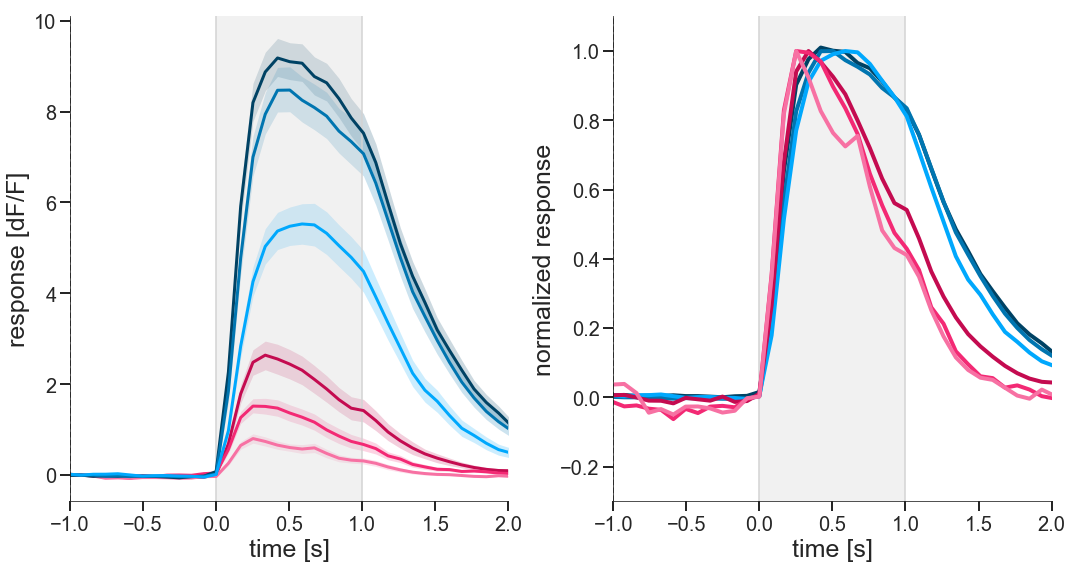

In [6]:
#for Figure 5(B)
data = Tm3_data_Fig5

#for Figure 5(C)
#data = Mi1_data_Fig5

#for Figure S2
#data = L1_data_FigS2


fig = plt.figure(figsize = (15,8))
gs1 = gridspec.GridSpec(1, 2)

with sns.axes_style('white'):
    ax1 = plt.subplot(gs1[0,0])
    ax2 = plt.subplot(gs1[0,1])

#windows for baseline
normalise_before = [-1,-.9]
normalise_start = [-0.1,0]    
offset = 0.01
    
ci = 68

time = np.sort(data.index.get_level_values('time').unique())
time = time[(time>-3.)&(time<3.4)]
  

ax1.axvline(0, color = 'lightgrey')
ax1.axvline(1, color = 'lightgrey')    

sns.tsplot(ax = ax1, time = time,
          data = (data.xs(( 1., "mov_grat, 100%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs(( 1.,  "mov_grat, 100%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean()).values.T,linewidth = 3, color = mov_grat_100,err_style = 'ci_band', ci = ci, alpha = 1.0)
sns.tsplot(ax = ax1, time = time,
          data = (data.xs(( 1.,  "mov_grat, 75%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs(( 1.,  "mov_grat, 75%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean()).values.T,linewidth = 3, color = mov_grat_75, err_style = 'ci_band', ci = ci, alpha = 1.0)
sns.tsplot(ax = ax1, time = time,
          data = (data.xs(( 1.,  "mov_grat, 50%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs(( 1.,  "mov_grat, 50%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean()).values.T,linewidth = 3, color = mov_grat_50, err_style = 'ci_band', ci = ci, alpha = 1.0)

sns.tsplot(ax = ax1, time = time,
          data = (data.xs(( 1., "gray, 100%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs(( 1.,  "gray, 100%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean()).values.T,linewidth = 3, color = gray_100,err_style = 'ci_band', ci = ci, alpha = 1.0)
sns.tsplot(ax = ax1, time = time,
          data = (data.xs(( 1.,  "gray, 75%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs(( 1.,  "gray, 75%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean()).values.T,linewidth = 3, color = gray_75, err_style = 'ci_band', ci = ci, alpha = 1.0)
sns.tsplot(ax = ax1, time = time,
          data = (data.xs(( 1.,  "gray, 50%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs(( 1.,  "gray, 50%"), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean()).values.T,linewidth = 3, color = gray_50, err_style = 'ci_band', ci = ci, alpha = 1.0)

ax1.axvspan(0, 1, color='lightgrey', alpha = 0.3)
ax1.axvline(-1, color = 'black', linestyle = '--')
ax1.axvline(2.5,color = 'black', linestyle = '--')
ax1.set_xlim(-1, 2)
ax1.set_ylabel('response [dF/F]', fontsize = 25)
ax1.set_xlabel('time [s]', fontsize = 25)
ax1.tick_params(axis="x", labelsize=20)
ax1.tick_params(axis="y", labelsize=20)
ax1.tick_params(direction='out', length=10, width=2)
ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()
sns.despine(ax = ax1)


ax2.axvline(0, color = 'lightgrey')
ax2.axvline(1, color = 'lightgrey')

ax2.plot(time, offset + (data.xs(( 1., "gray, 100%"), level = ( "step_dts", 'velocities'))[time[0]:time[-1]]-data.xs(( 1.,  "gray, 100%"), level = ( "step_dts", 'velocities'))[normalise_start[0]:normalise_start[1]].mean(1).mean()).divide(data.xs((  1., "gray, 100%"), level = ("step_dts", 'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs(( 1., "gray, 100%"), level = ("step_dts",  'velocities'))[normalise_start[0]:normalise_start[1]].mean(1).mean()).mean(1), color = gray_100, linewidth = 4,  alpha = 1.0)
ax2.plot(time, (data.xs(( 1., "gray, 75%"), level = ( "step_dts", 'velocities'))[time[0]:time[-1]]-data.xs(( 1.,  "gray, 75%"), level = ( "step_dts", 'velocities'))[normalise_start[0]:normalise_start[1]].mean(1).mean()).divide(data.xs((  1., "gray, 75%"), level = ("step_dts", 'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs(( 1., "gray, 75%"), level = ("step_dts",  'velocities'))[normalise_start[0]:normalise_start[1]].mean(1).mean()).mean(1), color = gray_75, linewidth = 4,  alpha = 1.0)
ax2.plot(time, (data.xs(( 1., "gray, 50%"), level = ( "step_dts", 'velocities'))[time[0]:time[-1]]-data.xs(( 1.,  "gray, 50%"), level = ( "step_dts", 'velocities'))[normalise_start[0]:normalise_start[1]].mean(1).mean()).divide(data.xs((  1., "gray, 50%"), level = ("step_dts", 'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs(( 1., "gray, 50%"), level = ("step_dts",  'velocities'))[normalise_start[0]:normalise_start[1]].mean(1).mean()).mean(1), color = gray_50, linewidth = 4,  alpha = 1.0)
ax2.plot(time, (data.xs(( 1., "mov_grat, 100%"), level = ( "step_dts", 'velocities'))[time[0]:time[-1]]-data.xs(( 1.,  "mov_grat, 100%"), level = ( "step_dts", 'velocities'))[normalise_start[0]:normalise_start[1]].mean(1).mean()).divide(data.xs((  1., "mov_grat, 100%"), level = ("step_dts", 'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs(( 1., "mov_grat, 100%"), level = ("step_dts",  'velocities'))[normalise_start[0]:normalise_start[1]].mean(1).mean()).mean(1), color = mov_grat_100, linewidth = 4,  alpha = 1.0)
ax2.plot(time, (data.xs(( 1., "mov_grat, 75%"), level = ( "step_dts", 'velocities'))[time[0]:time[-1]]-data.xs(( 1.,  "mov_grat, 75%"), level = ( "step_dts", 'velocities'))[normalise_start[0]:normalise_start[1]].mean(1).mean()).divide(data.xs((  1., "mov_grat, 75%"), level = ("step_dts", 'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs(( 1., "mov_grat, 75%"), level = ("step_dts",  'velocities'))[normalise_start[0]:normalise_start[1]].mean(1).mean()).mean(1), color = mov_grat_75, linewidth = 4,  alpha = 1.0)
ax2.plot(time, (data.xs(( 1., "mov_grat, 50%"), level = ( "step_dts", 'velocities'))[time[0]:time[-1]]-data.xs(( 1.,  "mov_grat, 50%"), level = ( "step_dts", 'velocities'))[normalise_start[0]:normalise_start[1]].mean(1).mean()).divide(data.xs((  1., "mov_grat, 50%"), level = ("step_dts", 'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs(( 1., "mov_grat, 50%"), level = ("step_dts",  'velocities'))[normalise_start[0]:normalise_start[1]].mean(1).mean()).mean(1), color = mov_grat_50, linewidth = 4,  alpha = 1.0)

ax2.axvspan(0, 1, color='lightgrey', alpha = 0.3)
ax2.axvline(-1, color = 'black', linestyle = '--')
ax2.axvline(2.5,color = 'black', linestyle = '--')
ax2.set_xlim(-1, 2)
ax2.set_ylim(-.3, 1.1)
ax2.set_ylabel('normalized response', fontsize = 25)
ax2.tick_params(axis="x", labelsize=20)
ax2.tick_params(axis="y", labelsize=20)
ax2.set_xlabel('time [s]', fontsize = 25)
sns.despine(ax = ax2)
ax2.tick_params(direction='out', length=10, width=2)
ax2.xaxis.tick_bottom()
ax2.yaxis.tick_left()

plt.tight_layout()

In [107]:
#for Figure S3
def significance(value):
    if value < 0.001:
        return "***"
    elif value < 0.01:
        return "**"
    elif value < 0.05:
        return "*"
    else:
        return "n.s."

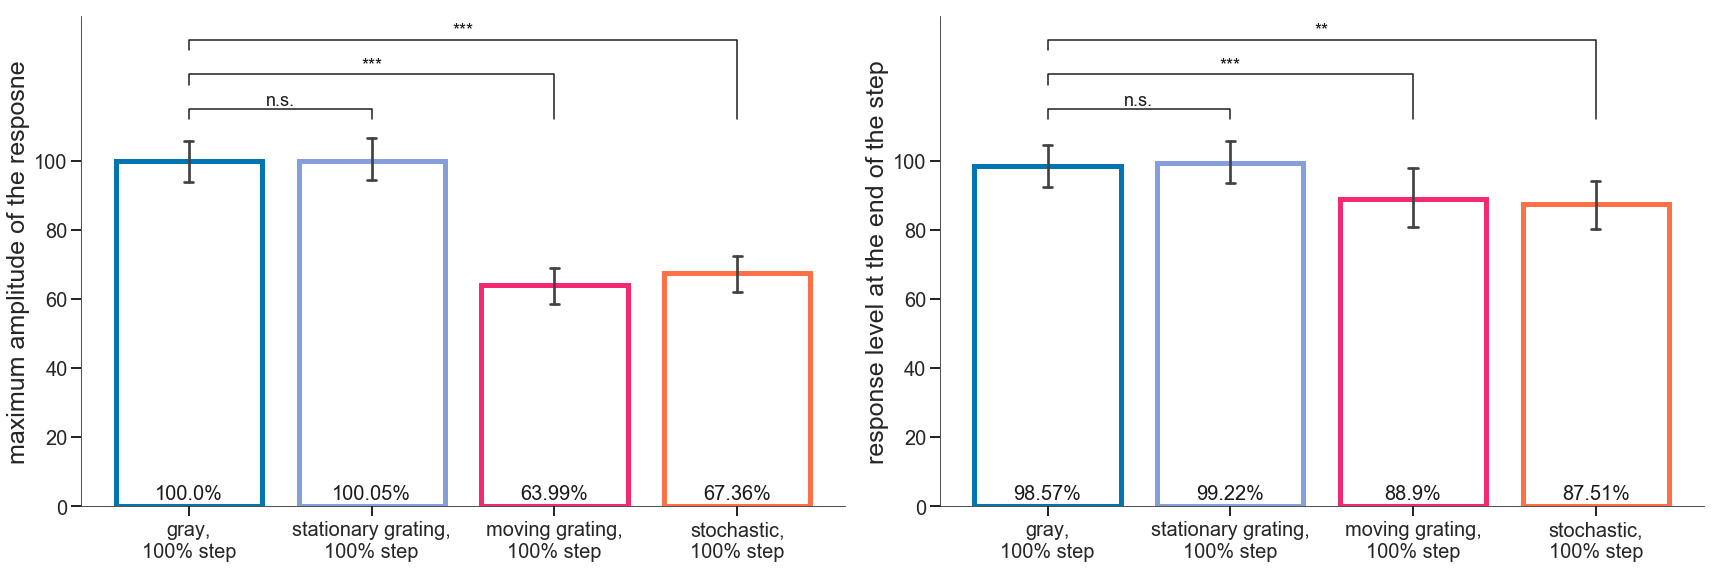

In [234]:
#for Figure S3(A)
#data = Tm3_data_Fig2

#for Figure S3(B)
data = Mi1_data_FigS1


fig = plt.figure(figsize = (24,8))
gs1 = gridspec.GridSpec(1, 2)

with sns.axes_style('white'):
    ax1 = plt.subplot(gs1[0,0])
    ax2 = plt.subplot(gs1[0,1])
    
#windows for baseline
normalise_before = [-1,-.9]
normalise_start = [-0.1,0]    
offset = 0.01

decay_window = [0.9,1.1]
    
ci = 68

time = np.sort(data.index.get_level_values('time').unique())
time = time[(time>-3.)&(time<3.4)]

condition = "mov_grat, 100%"
data_mov = (data.xs(( 1., condition), level = ("step_dts",'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs(( 1.,  condition), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean())
max_mov = np.max(data_mov)
data_mov = (data.xs((1.0, condition), level = ('step_dts', 'velocities'))[time[0]:time[-1]]-data.xs((1.0, condition), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).divide(data.xs((1.0, condition), level = ('step_dts', 'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs((1.0, condition), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean())
decay_mov = np.mean(data_mov.mean(1)[decay_window[0]:decay_window[1]])*100

condition = "gray, 100%"
data_grey = (data.xs(( 1., condition), level = ("step_dts",'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs(( 1.,  condition), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean())
max_grey = np.max(data_grey)
data_grey = (data.xs((1.0, condition), level = ('step_dts', 'velocities'))[time[0]:time[-1]]-data.xs((1.0, condition), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).divide(data.xs((1.0, condition), level = ('step_dts', 'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs((1.0, condition), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean())
decay_grey = np.mean(data_grey.mean(1)[decay_window[0]:decay_window[1]])*100

condition = "stat_grat, 100%"
data_stat = (data.xs(( 1., condition), level = ("step_dts",'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs(( 1.,  condition), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean())
max_stat = np.max(data_stat)
data_stat = (data.xs((1.0, condition), level = ('step_dts', 'velocities'))[time[0]:time[-1]]-data.xs((1.0, condition), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).divide(data.xs((1.0, condition), level = ('step_dts', 'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs((1.0, condition), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean())
decay_stat = np.mean(data_stat.mean(1)[decay_window[0]:decay_window[1]])*100

condition = "pix_noise, 100%"
data_pix = (data.xs(( 1., condition), level = ("step_dts",'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs(( 1.,  condition), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean())
max_pix = np.max(data_pix)
data_pix = (data.xs((1.0, condition), level = ('step_dts', 'velocities'))[time[0]:time[-1]]-data.xs((1.0, condition), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).divide(data.xs((1.0, condition), level = ('step_dts', 'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs((1.0, condition), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean())
decay_pix = np.mean(data_pix.mean(1)[decay_window[0]:decay_window[1]])*100

df_amplitude = pd.DataFrame([max_grey.values/max_grey.mean()*100,max_stat.values/max_grey.mean()*100,max_mov.values/max_grey.mean()*100,max_pix.values/max_grey.mean()*100], index = ["gray, 100% step", "stationary grating, 100% step", "moving grating, 100% step", "stochastic, 100% step"])
sns.barplot(ax = ax1, data = df_amplitude.T, capsize=.05, color = "grey",linewidth=5, ci = ci, edgecolor = [gray, stat_grat,mov_grat, pix_noise], facecolor = "white")

ax1.text(0, 1, str(round(max_grey.mean()/max_grey.mean()*100,2)) + '%', ha='center', va='bottom', color='k', fontsize = 20)
ax1.text(2, 1, str(round(max_mov.mean()/max_grey.mean()*100,2)) + '%', ha='center', va='bottom', color='k', fontsize = 20)
ax1.text(1, 1, str(round(max_stat.mean()/max_grey.mean()*100,2)) + '%', ha='center', va='bottom', color='k', fontsize = 20)
ax1.text(3, 1, str(round(max_pix.mean()/max_grey.mean()*100,2)) + '%', ha='center', va='bottom', color='k', fontsize = 20)

df_dynamics = pd.DataFrame([data_grey[decay_window[0]:decay_window[1]].mean().values*100,data_stat[decay_window[0]:decay_window[1]].mean().values*100, data_mov[decay_window[0]:decay_window[1]].mean().values*100, data_pix[decay_window[0]:decay_window[1]].mean().values*100], index = ["gray, 100% step", "stationary grating, 100% step", "moving grating, 100% step", "stochastic, 100% step"])
sns.barplot(ax = ax2, data = df_dynamics.T, capsize=.05, color = "grey",linewidth=5, ci = ci, edgecolor = [gray, stat_grat,mov_grat, pix_noise], facecolor = "white")

ax2.text(0, 1, str(str(round(decay_grey,2)) + '%'), ha='center', va='bottom', color='k', fontsize = 20)
ax2.text(1, 1, str(str(round(decay_stat,2)) + '%'), ha='center', va='bottom', color='k', fontsize = 20)
ax2.text(2, 1, str(str(round(decay_mov,2)) + '%'), ha='center', va='bottom', color='k', fontsize = 20)
ax2.text(3, 1, str(str(round(decay_pix,2)) + '%'), ha='center', va='bottom', color='k', fontsize = 20)

value = stats.mannwhitneyu(max_grey.values, max_stat.values)[1]
ax1.plot([0, 0, 1, 1], [112, 115, 115, 112], lw=1.5, c='k')
ax1.text(0.5, 115, significance(value), ha='center', va='bottom', color='k', fontsize = 18)

value = stats.mannwhitneyu(max_grey.values, max_mov.values)[1]
ax1.plot([0, 0, 2, 2], [122, 125, 125, 112], lw=1.5, c='k')
ax1.text(1, 125, significance(value), ha='center', va='bottom', color='k', fontsize = 18)

value = stats.mannwhitneyu(max_grey.values, max_pix.values)[1]
ax1.text(1.5, 135, significance(value), ha='center', va='bottom', color='k', fontsize = 18)
ax1.plot([0, 0, 3, 3], [132, 135, 135, 112], lw=1.5, c='k')

value = stats.mannwhitneyu(data_grey[decay_window[0]:decay_window[1]].mean().values, data_stat[decay_window[0]:decay_window[1]].mean().values)[1]
ax2.plot([0, 0, 1, 1], [112, 115, 115, 112], lw=1.5, c='k')
ax2.text(0.5, 115, significance(value), ha='center', va='bottom', color='k', fontsize = 18)

value = stats.mannwhitneyu(data_grey[decay_window[0]:decay_window[1]].mean().values, data_mov[decay_window[0]:decay_window[1]].mean().values)[1]
ax2.plot([0, 0, 2, 2], [122, 125, 125, 112], lw=1.5, c='k')
ax2.text(1, 125, significance(value), ha='center', va='bottom', color='k', fontsize = 18)

value = stats.mannwhitneyu(data_grey[decay_window[0]:decay_window[1]].mean().values, data_pix[decay_window[0]:decay_window[1]].mean().values)[1]
ax2.text(1.5, 135, significance(value), ha='center', va='bottom', color='k', fontsize = 18)
ax2.plot([0, 0, 3, 3], [132, 135, 135, 112], lw=1.5, c='k')

ax1.set_ylabel('maximum amplitude of the resposne', fontsize = 25)
ax1.tick_params(axis="x", labelsize=20, rotation = 0)
ax1.tick_params(axis="y", labelsize=20)
ax1.tick_params(direction='out', length=10, width=2)
ax1.set_yticks([0, 20, 40, 60, 80, 100])
ax1.set_xticklabels(["gray,\n100% step", "stationary grating,\n100% step", "moving grating,\n100% step", "stochastic,\n100% step"])
ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()
sns.despine(ax = ax1)

ax2.set_ylabel('response level at the end of the step', fontsize = 25)
ax2.tick_params(axis="x", labelsize=20, rotation = 0)
ax2.tick_params(axis="y", labelsize=20)
ax2.tick_params(direction='out', length=10, width=2)
ax2.set_yticks([0, 20, 40, 60, 80, 100])
ax2.set_xticklabels(["gray,\n100% step", "stationary grating,\n100% step", "moving grating,\n100% step", "stochastic,\n100% step"])
ax2.xaxis.tick_bottom()
ax2.yaxis.tick_left()
sns.despine(ax = ax2)

plt.tight_layout()

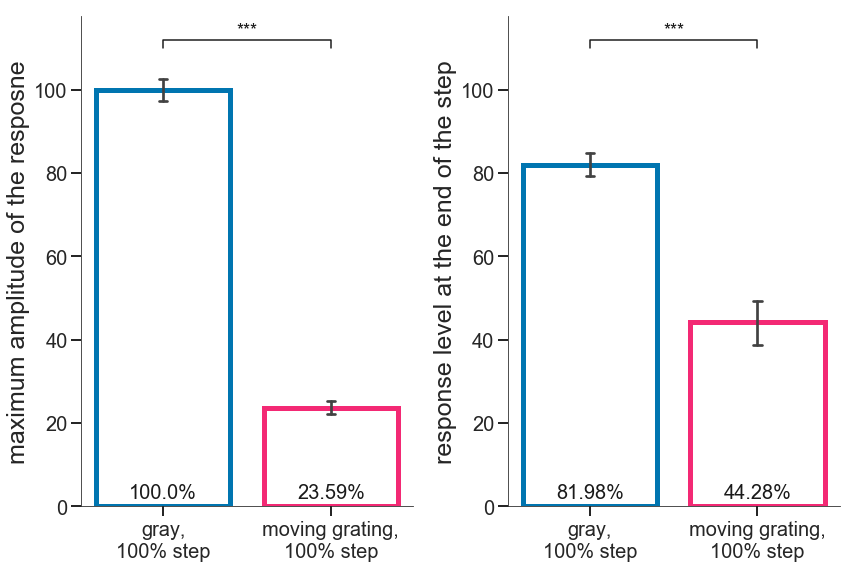

In [227]:
#for Figure S3(C)
#data = Mi1_data_Fig3

#for Figure S3(D)
#data = Tm1_data_Fig3

#for Figure S3(E)
#data = Tm2_data_Fig3

#for Figure S3(F)
data = Tm3_data_Fig3

fig = plt.figure(figsize = (12,8))
gs1 = gridspec.GridSpec(1, 2)

with sns.axes_style('white'):
    ax1 = plt.subplot(gs1[0,0])
    ax2 = plt.subplot(gs1[0,1])
    
#windows for baseline
normalise_before = [-1,-.9]
normalise_start = [-0.1,0]    
offset = 0.01

decay_window = [0.9,1.1]
    
ci = 68

time = np.sort(data.index.get_level_values('time').unique())
time = time[(time>-3.)&(time<3.4)]

condition = "mov_grat, 100%"
data_mov = (data.xs(( 1., condition), level = ("step_dts",'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs(( 1.,  condition), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean())
max_mov = np.max(data_mov)
data_mov = (data.xs((1.0, condition), level = ('step_dts', 'velocities'))[time[0]:time[-1]]-data.xs((1.0, condition), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).divide(data.xs((1.0, condition), level = ('step_dts', 'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs((1.0, condition), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean())
decay_mov = np.mean(data_mov.mean(1)[decay_window[0]:decay_window[1]])*100

condition = "gray, 100%"
data_grey = (data.xs(( 1., condition), level = ("step_dts",'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs(( 1.,  condition), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean())
max_grey = np.max(data_grey)
data_grey = (data.xs((1.0, condition), level = ('step_dts', 'velocities'))[time[0]:time[-1]]-data.xs((1.0, condition), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).divide(data.xs((1.0, condition), level = ('step_dts', 'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs((1.0, condition), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean())
decay_grey = np.mean(data_grey.mean(1)[decay_window[0]:decay_window[1]])*100

df_amplitude = pd.DataFrame([max_grey.values/max_grey.mean()*100,max_mov.values/max_grey.mean()*100], index = ["gray, 100% step", "moving grating, 100% step"])
sns.barplot(ax = ax1, data = df_amplitude.T, capsize=.05, color = "grey",linewidth=5, ci = ci, edgecolor = [gray, mov_grat], facecolor = "white")

ax1.text(0, 1, str(round(max_grey.mean()/max_grey.mean()*100,2)) + '%', ha='center', va='bottom', color='k', fontsize = 20)
ax1.text(1, 1, str(round(max_mov.mean()/max_grey.mean()*100,2)) + '%', ha='center', va='bottom', color='k', fontsize = 20)

df_dynamics = pd.DataFrame([data_grey[decay_window[0]:decay_window[1]].mean().values*100, data_mov[decay_window[0]:decay_window[1]].mean().values*100], index = ["gray, 100% step", "moving grating, 100% step"])
sns.barplot(ax = ax2, data = df_dynamics.T, capsize=.05, color = "grey",linewidth=5, ci = ci, edgecolor = [gray, mov_grat], facecolor = "white")

ax2.text(0, 1, str(str(round(decay_grey,2)) + '%'), ha='center', va='bottom', color='k', fontsize = 20)
ax2.text(1, 1, str(str(round(decay_mov,2)) + '%'), ha='center', va='bottom', color='k', fontsize = 20)

value = stats.mannwhitneyu(max_grey.values, max_mov.values)[1]
ax1.plot([0, 0, 1, 1], [110, 112, 112, 110], lw=1.5, c='k')
ax1.text(0.5, 112, significance(value), ha='center', va='bottom', color='k', fontsize = 18)

value = stats.mannwhitneyu(data_grey[decay_window[0]:decay_window[1]].mean().values, data_mov[decay_window[0]:decay_window[1]].mean().values)[1]
ax2.plot([0, 0, 1, 1], [110, 112, 112, 110], lw=1.5, c='k')
ax2.text(0.5, 112, significance(value), ha='center', va='bottom', color='k', fontsize = 18)

ax1.set_ylabel('maximum amplitude of the resposne', fontsize = 25)
ax1.tick_params(axis="x", labelsize=20, rotation = 0)
ax1.tick_params(axis="y", labelsize=20)
ax1.tick_params(direction='out', length=10, width=2)
ax1.set_yticks([0, 20, 40, 60, 80, 100])
ax1.set_xticklabels(["gray,\n100% step","moving grating,\n100% step"])
ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()
sns.despine(ax = ax1)

ax2.set_ylabel('response level at the end of the step', fontsize = 25)
ax2.tick_params(axis="x", labelsize=20, rotation = 0)
ax2.tick_params(axis="y", labelsize=20)
ax2.tick_params(direction='out', length=10, width=2)
ax2.set_yticks([0, 20, 40, 60, 80, 100])
ax2.set_xticklabels(["gray,\n100% step", "moving grating,\n100% step"])
ax2.xaxis.tick_bottom()
ax2.yaxis.tick_left()
sns.despine(ax = ax2)

plt.tight_layout()

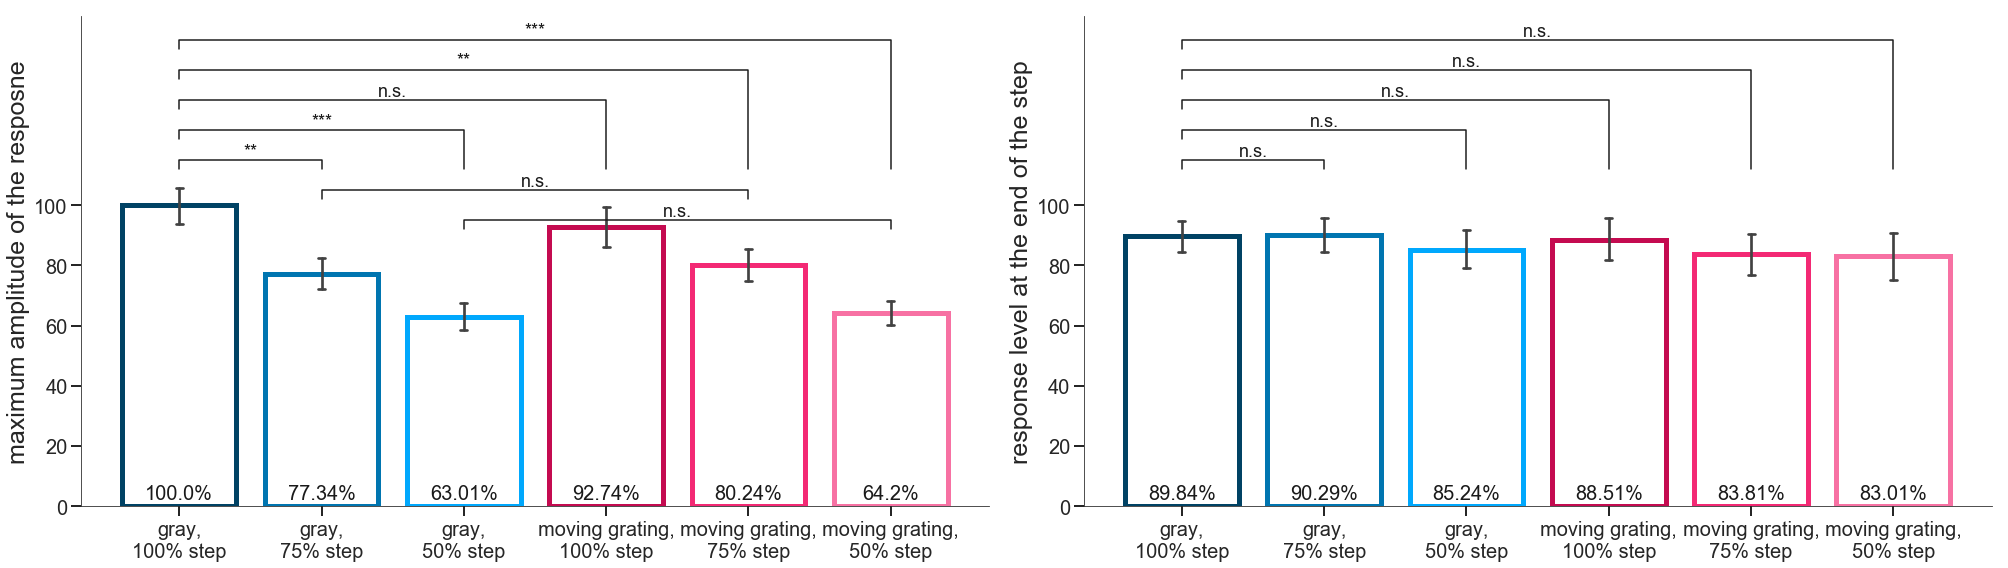

In [313]:
#for Figure S3(G)
#data = Tm3_data_Fig5

#for Figure S3(H)
#data = Mi1_data_Fig5

#for Figure S3(I)
data = L1_data_FigS2

fig = plt.figure(figsize = (28,8))
gs1 = gridspec.GridSpec(1, 2)

with sns.axes_style('white'):
    ax1 = plt.subplot(gs1[0,0])
    ax2 = plt.subplot(gs1[0,1])
    
#windows for baseline
normalise_before = [-1,-.9]
normalise_start = [-0.1,0]    
offset = 0.01

decay_window = [0.9,1.1]
    
ci = 68

time = np.sort(data.index.get_level_values('time').unique())
time = time[(time>-3.)&(time<3.4)]

condition = "mov_grat, 100%"
data_mov = (data.xs(( 1., condition), level = ("step_dts",'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs(( 1.,  condition), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean())
max_mov = np.max(data_mov)
data_mov = (data.xs((1.0, condition), level = ('step_dts', 'velocities'))[time[0]:time[-1]]-data.xs((1.0, condition), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).divide(data.xs((1.0, condition), level = ('step_dts', 'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs((1.0, condition), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean())
decay_mov = np.mean(data_mov.mean(1)[decay_window[0]:decay_window[1]])*100

condition = "mov_grat, 75%"
data_mov75 = (data.xs(( 1., condition), level = ("step_dts",'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs(( 1.,  condition), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean())
max_mov75 = np.max(data_mov75)
data_mov75 = (data.xs((1.0, condition), level = ('step_dts', 'velocities'))[time[0]:time[-1]]-data.xs((1.0, condition), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).divide(data.xs((1.0, condition), level = ('step_dts', 'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs((1.0, condition), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean())
decay_mov75 = np.mean(data_mov75.mean(1)[decay_window[0]:decay_window[1]])*100

condition = "mov_grat, 50%"
data_mov50 = (data.xs(( 1., condition), level = ("step_dts",'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs(( 1.,  condition), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean())
max_mov50 = np.max(data_mov50)
data_mov50 = (data.xs((1.0, condition), level = ('step_dts', 'velocities'))[time[0]:time[-1]]-data.xs((1.0, condition), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).divide(data.xs((1.0, condition), level = ('step_dts', 'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs((1.0, condition), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean())
decay_mov50 = np.mean(data_mov50.mean(1)[decay_window[0]:decay_window[1]])*100

condition = "gray, 100%"
data_grey = (data.xs(( 1., condition), level = ("step_dts",'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs(( 1.,  condition), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean())
max_grey = np.max(data_grey)
data_grey = (data.xs((1.0, condition), level = ('step_dts', 'velocities'))[time[0]:time[-1]]-data.xs((1.0, condition), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).divide(data.xs((1.0, condition), level = ('step_dts', 'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs((1.0, condition), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean())
decay_grey = np.mean(data_grey.mean(1)[decay_window[0]:decay_window[1]])*100

condition = "gray, 75%"
data_grey75 = (data.xs(( 1., condition), level = ("step_dts",'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs(( 1.,  condition), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean())
max_grey75 = np.max(data_grey75)
data_grey75 = (data.xs((1.0, condition), level = ('step_dts', 'velocities'))[time[0]:time[-1]]-data.xs((1.0, condition), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).divide(data.xs((1.0, condition), level = ('step_dts', 'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs((1.0, condition), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean())
decay_grey75 = np.mean(data_grey75.mean(1)[decay_window[0]:decay_window[1]])*100

condition = "gray, 50%"
data_grey50 = (data.xs(( 1., condition), level = ("step_dts",'velocities')).dropna(1, how = "all")[time[0]:time[-1]]-data.xs(( 1.,  condition), level = ("step_dts",'velocities')).dropna(1, how = "all")[normalise_before[0]:normalise_before[1]].mean(1).mean())
max_grey50 = np.max(data_grey50)
data_grey50 = (data.xs((1.0, condition), level = ('step_dts', 'velocities'))[time[0]:time[-1]]-data.xs((1.0, condition), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean()).divide(data.xs((1.0, condition), level = ('step_dts', 'velocities'))[time[0]:time[-1]].mean(1).max()-data.xs((1.0, condition), level = ('step_dts', 'velocities'))[normalise_start[0]: normalise_start[1]].mean(1).mean())
decay_grey50 = np.mean(data_grey50.mean(1)[decay_window[0]:decay_window[1]])*100

df_amplitude = pd.DataFrame([max_grey.values/max_grey.mean()*100,max_grey75.values/max_grey.mean()*100,max_grey50.values/max_grey.mean()*100,max_mov.values/max_grey.mean()*100,max_mov75.values/max_grey.mean()*100,max_mov50.values/max_grey.mean()*100], index = ["gray, 100% step", "gray, 75% step", "gray, 50% step", "moving grating, 100% step", "moving grating, 75% step", "moving grating, 50% step"])
sns.barplot(ax = ax1, data = df_amplitude.T, capsize=.05, color = "grey",linewidth=5, ci = ci, edgecolor = [gray_100, gray_75, gray_50, mov_grat_100, mov_grat_75, mov_grat_50], facecolor = "white")

ax1.text(0, 1, str(round(max_grey.mean()/max_grey.mean()*100,2)) + '%', ha='center', va='bottom', color='k', fontsize = 20)
ax1.text(1, 1, str(round(max_grey75.mean()/max_grey.mean()*100,2)) + '%', ha='center', va='bottom', color='k', fontsize = 20)
ax1.text(2, 1, str(round(max_grey50.mean()/max_grey.mean()*100,2)) + '%', ha='center', va='bottom', color='k', fontsize = 20)
ax1.text(3, 1, str(round(max_mov.mean()/max_grey.mean()*100,2)) + '%', ha='center', va='bottom', color='k', fontsize = 20)
ax1.text(4, 1, str(round(max_mov75.mean()/max_grey.mean()*100,2)) + '%', ha='center', va='bottom', color='k', fontsize = 20)
ax1.text(5, 1, str(round(max_mov50.mean()/max_grey.mean()*100,2)) + '%', ha='center', va='bottom', color='k', fontsize = 20)

df_dynamics = pd.DataFrame([data_grey[0.9:1.1].mean().values*100,data_grey75[0.9:1.1].mean().values*100,data_grey50[0.9:1.1].mean().values*100,data_mov[0.9:1.1].mean().values*100,data_mov75[0.9:1.1].mean().values*100,data_mov50[0.9:1.1].mean().values*100], index = ["gray, 100% step", "gray, 75% step", "gray, 50% step", "moving grating, 100% step", "moving grating, 75% step", "moving grating, 50% step"])
sns.barplot(ax = ax2, data = df_dynamics.T, capsize=.05, color = "grey",linewidth=5, ci = ci, edgecolor = [gray_100, gray_75, gray_50, mov_grat_100, mov_grat_75, mov_grat_50], facecolor = "white")

ax2.text(0, 1, str(str(round(decay_grey,2)) + '%'), ha='center', va='bottom', color='k', fontsize = 20)
ax2.text(1, 1, str(str(round(decay_grey75,2)) + '%'), ha='center', va='bottom', color='k', fontsize = 20)
ax2.text(2, 1, str(str(round(decay_grey50,2)) + '%'), ha='center', va='bottom', color='k', fontsize = 20)
ax2.text(3, 1, str(str(round(decay_mov,2)) + '%'), ha='center', va='bottom', color='k', fontsize = 20)
ax2.text(4, 1, str(str(round(decay_mov75,2)) + '%'), ha='center', va='bottom', color='k', fontsize = 20)
ax2.text(5, 1, str(str(round(decay_mov50,2)) + '%'), ha='center', va='bottom', color='k', fontsize = 20)

value = stats.mannwhitneyu(max_grey.values, max_grey75.values)[1]
ax1.plot([0, 0, 1, 1], [112, 115, 115, 112], lw=1.5, c='k')
ax1.text(0.5, 115, significance(value), ha='center', va='bottom', color='k', fontsize = 18)

value = stats.mannwhitneyu(max_grey.values, max_grey50.values)[1]
ax1.plot([0, 0, 2, 2], [122, 125, 125, 112], lw=1.5, c='k')
ax1.text(1, 125, significance(value), ha='center', va='bottom', color='k', fontsize = 18)

value = stats.mannwhitneyu(max_grey.values, max_mov.values)[1]
ax1.text(1.5, 135, significance(value), ha='center', va='bottom', color='k', fontsize = 18)
ax1.plot([0, 0, 3, 3], [132, 135, 135, 112], lw=1.5, c='k')

value = stats.mannwhitneyu(max_grey.values, max_mov75.values)[1]
ax1.text(2, 145, significance(value), ha='center', va='bottom', color='k', fontsize = 18)
ax1.plot([0, 0, 4, 4], [142, 145, 145, 112], lw=1.5, c='k')

value = stats.mannwhitneyu(max_grey.values, max_mov50.values)[1]
ax1.text(2.5, 155, significance(value), ha='center', va='bottom', color='k', fontsize = 18)
ax1.plot([0, 0, 5, 5], [152, 155, 155, 112], lw=1.5, c='k')

#Figure S3(G) and S3(H)
#value = stats.mannwhitneyu(max_mov.values, max_mov75.values)[1]
#ax1.text(3.5, 95, significance(value), ha='center', va='bottom', color='k', fontsize = 18)
#ax1.plot([3, 3, 4, 4], [92, 95, 95, 92], lw=1.5, c='k')

#Figure S3(G) and S3(H)
#value = stats.mannwhitneyu(max_mov.values, max_mov50.values)[1]
#ax1.text(4, 105, significance(value), ha='center', va='bottom', color='k', fontsize = 18)
#ax1.plot([3, 3, 5, 5], [102, 105, 105, 92], lw=1.5, c='k')

#Figure S3(I)
value = stats.mannwhitneyu(max_grey75.values, max_mov75.values)[1]
ax1.text(2.5, 105, significance(value), ha='center', va='bottom', color='k', fontsize = 18)
ax1.plot([1, 1, 4, 4], [102, 105, 105, 102], lw=1.5, c='k')

#Figure S3(I)
value = stats.mannwhitneyu(max_grey50.values, max_mov50.values)[1]
ax1.text(3.5, 95, significance(value), ha='center', va='bottom', color='k', fontsize = 18)
ax1.plot([2, 2, 5, 5], [92, 95, 95, 92], lw=1.5, c='k')

value = stats.mannwhitneyu(data_grey[decay_window[0]:decay_window[1]].mean().values, data_grey75[decay_window[0]:decay_window[1]].mean().values)[1]
ax2.plot([0, 0, 1, 1], [112, 115, 115, 112], lw=1.5, c='k')
ax2.text(0.5, 115, significance(value), ha='center', va='bottom', color='k', fontsize = 18)

value = stats.mannwhitneyu(data_grey[decay_window[0]:decay_window[1]].mean().values, data_grey50[decay_window[0]:decay_window[1]].mean().values)[1]
ax2.plot([0, 0, 2, 2], [122, 125, 125, 112], lw=1.5, c='k')
ax2.text(1, 125, significance(value), ha='center', va='bottom', color='k', fontsize = 18)

value = stats.mannwhitneyu(data_grey[decay_window[0]:decay_window[1]].mean().values, data_mov[decay_window[0]:decay_window[1]].mean().values)[1]
ax2.text(1.5, 135, significance(value), ha='center', va='bottom', color='k', fontsize = 18)
ax2.plot([0, 0, 3, 3], [132, 135, 135, 112], lw=1.5, c='k')

value = stats.mannwhitneyu(data_grey[decay_window[0]:decay_window[1]].mean().values, data_mov75[decay_window[0]:decay_window[1]].mean().values)[1]
ax2.text(2, 145, significance(value), ha='center', va='bottom', color='k', fontsize = 18)
ax2.plot([0, 0, 4, 4], [142, 145, 145, 112], lw=1.5, c='k')

value = stats.mannwhitneyu(data_grey[decay_window[0]:decay_window[1]].mean().values, data_mov50[decay_window[0]:decay_window[1]].mean().values)[1]
ax2.text(2.5, 155, significance(value), ha='center', va='bottom', color='k', fontsize = 18)
ax2.plot([0, 0, 5, 5], [152, 155, 155, 112], lw=1.5, c='k')

#for Figure S3(G) and S3(H)
#value = stats.mannwhitneyu(data_mov[decay_window[0]:decay_window[1]].mean().values, data_mov75[decay_window[0]:decay_window[1]].mean().values)[1]
#ax2.text(3.5, 95, significance(value), ha='center', va='bottom', color='k', fontsize = 18)
#ax2.plot([3, 3, 4, 4], [92, 95, 95, 92], lw=1.5, c='k')

#for Figure S3(G) and S3(H)
#value = stats.mannwhitneyu(data_mov[decay_window[0]:decay_window[1]].mean().values, data_mov50[decay_window[0]:decay_window[1]].mean().values)[1]
#ax2.text(4, 105, significance(value), ha='center', va='bottom', color='k', fontsize = 18)
#ax2.plot([3, 3, 5, 5], [102, 105, 105, 92], lw=1.5, c='k')

ax1.set_ylabel('maximum amplitude of the resposne', fontsize = 25)
ax1.tick_params(axis="x", labelsize=20, rotation = 0)
ax1.tick_params(axis="y", labelsize=20)
ax1.tick_params(direction='out', length=10, width=2)
ax1.set_yticks([0, 20, 40, 60, 80, 100])
ax1.set_xticklabels(["gray,\n100% step", "gray,\n75% step", "gray,\n50% step", "moving grating,\n100% step", "moving grating,\n75% step", "moving grating,\n50% step"])
ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()
sns.despine(ax = ax1)

ax2.set_ylabel('response level at the end of the step', fontsize = 25)
ax2.tick_params(axis="x", labelsize=20, rotation = 0)
ax2.tick_params(axis="y", labelsize=20)
ax2.tick_params(direction='out', length=10, width=2)
ax2.set_yticks([0, 20, 40, 60, 80, 100])
ax2.set_xticklabels(["gray,\n100% step", "gray,\n75% step", "gray,\n50% step", "moving grating,\n100% step", "moving grating,\n75% step", "moving grating,\n50% step"])
ax2.xaxis.tick_bottom()
ax2.yaxis.tick_left()
sns.despine(ax = ax2)

plt.tight_layout()

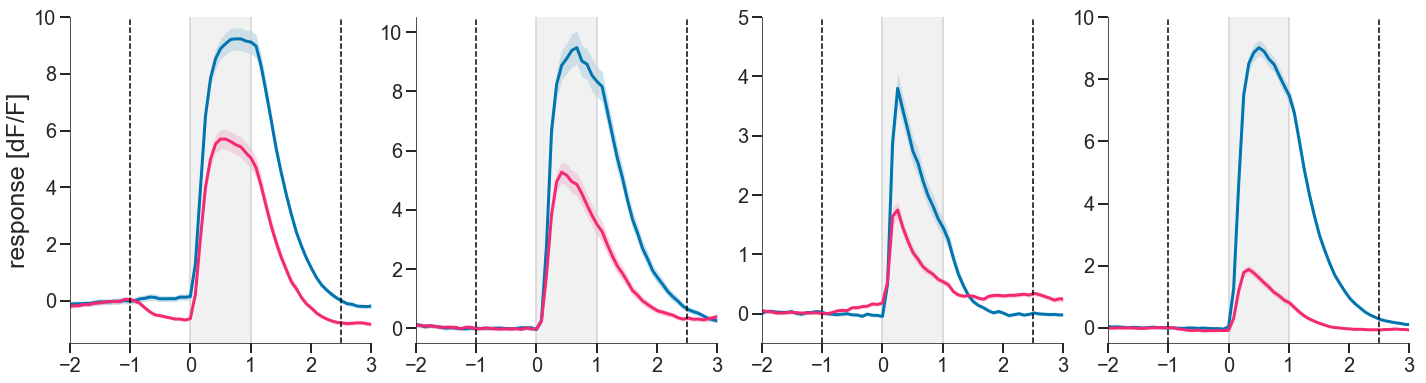

In [19]:
#for Figure S4

fig = plt.figure(figsize = (24,6))
gs1 = gridspec.GridSpec(1,4, wspace = 0.15)

with sns.axes_style('white'):
    ax1 = plt.subplot(gs1[0,0]) #Mi1
    ax3 = plt.subplot(gs1[0,1]) #Tm1
    ax5 = plt.subplot(gs1[0,3]) #Tm3
    ax7 = plt.subplot(gs1[0,2]) #Tm2

ci = 68

#windows for baseline
normalise_before = [-1,-.9]
normalise_start = [-0.1,0]

data = Mi1_data_Fig3
        
time = np.sort(data.loc[1].index.get_level_values('time').unique())
time = time[(time>-3.)&(time<3.4)]

ax1.axvline(0, color = 'lightgrey')
ax1.axvline(1, color = 'lightgrey')

sns.tsplot(ax = ax1, time = time,
          data = (data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[time[0]:time[-1]]-data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[normalise_before[0]: normalise_before[1]].mean(1).mean()).values.T, linewidth = 3, color = gray, err_style = 'ci_band', ci = ci, alpha = 1.0)
sns.tsplot(ax = ax1, time = time,
          data = (data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[time[0]:time[-1]]-data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[normalise_before[0]: normalise_before[1]].mean(1).mean()).values.T,linewidth = 3, color = mov_grat, err_style = 'ci_band', ci = ci, alpha = 1.0, condition = "moving background")

ax1.axvspan(0, 1, color='lightgrey', alpha = 0.3)
ax1.axvline(-1, color = 'black', linestyle = '--')
ax1.axvline(2.5,color = 'black', linestyle = '--')
ax1.set_xlim(-2, 3)
ax1.set_ylim(-1.5, 10)
ax1.set_ylabel('response [dF/F]', fontsize = 25)
ax1.set_xlabel('')
ax1.tick_params(axis="x", labelsize=20)
ax1.tick_params(axis="y", labelsize=20)
ax1.get_legend().remove()
ax1.tick_params(direction='out', length=10, width=2)
ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()
sns.despine(ax = ax1)




data = Tm2_data_Fig3

ax7.axvline(0, color = 'lightgrey')
ax7.axvline(1, color = 'lightgrey')
    
sns.tsplot(ax = ax7, time = time,
          data = (data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[time[0]:time[-1]]-data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[normalise_before[0]: normalise_before[1]].mean(1).mean()).values.T, linewidth = 3, color = gray, err_style = 'ci_band', ci = ci, alpha = 1.0)
sns.tsplot(ax = ax7, time = time,
          data = (data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[time[0]:time[-1]]-data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[normalise_before[0]: normalise_before[1]].mean(1).mean()).values.T,linewidth = 3, color = mov_grat, err_style = 'ci_band', ci = ci, alpha = 1.0, condition = "moving background")

ax7.axvspan(0, 1, color='lightgrey', alpha = 0.3)
ax7.axvline(-1, color = 'black', linestyle = '--')
ax7.axvline(2.5,color = 'black', linestyle = '--')
ax7.set_xlim(-2, 3)
ax7.set_ylim(-.5, 5)
ax7.set_xlabel('')
ax7.tick_params(axis="x", labelsize=20)
ax7.tick_params(axis="y", labelsize=20)
ax7.get_legend().remove()
ax7.tick_params(direction='out', length=10, width=2)
ax7.xaxis.tick_bottom()
ax7.yaxis.tick_left()
sns.despine(ax = ax7)





data = Tm1_data_Fig3

ax3.axvline(0, color = 'lightgrey')
ax3.axvline(1, color = 'lightgrey')
    
sns.tsplot(ax = ax3, time = time,
          data = (data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[time[0]:time[-1]]-data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[normalise_before[0]: normalise_before[1]].mean(1).mean()).values.T, linewidth = 3, color = gray, err_style = 'ci_band', ci = ci, alpha = 1.0)
sns.tsplot(ax = ax3, time = time,
          data = (data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[time[0]:time[-1]]-data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[normalise_before[0]: normalise_before[1]].mean(1).mean()).values.T,linewidth = 3, color = mov_grat, err_style = 'ci_band', ci = ci, alpha = 1.0, condition = "moving background")

ax3.axvspan(0, 1, color='lightgrey', alpha = 0.3)
ax3.axvline(-1, color = 'black', linestyle = '--')
ax3.axvline(2.5,color = 'black', linestyle = '--')
ax3.set_xlim(-2, 3)
ax3.set_ylim(-.5, 10.5)
ax3.tick_params(axis="x", labelsize=20)
ax3.tick_params(axis="y", labelsize=20)
ax3.get_legend().remove()
ax3.tick_params(direction='out', length=10, width=2)
ax3.xaxis.tick_bottom()
ax3.yaxis.tick_left()
sns.despine(ax = ax3)



data = Tm3_data_Fig3

ax5.axvline(0, color = 'lightgrey')
ax5.axvline(1, color = 'lightgrey')

sns.tsplot(ax = ax5, time = time,
          data = (data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[time[0]:time[-1]]-data.xs(( 1.0, "gray, 100%"), level = ("step_dts",'velocities'))[normalise_before[0]: normalise_before[1]].mean(1).mean()).values.T, linewidth = 3, color = gray, err_style = 'ci_band', ci = ci, alpha = 1.0)
sns.tsplot(ax = ax5, time = time,
          data = (data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[time[0]:time[-1]]-data.xs((1.0, "mov_grat, 100%"), level = ('step_dts', 'velocities'))[normalise_before[0]: normalise_before[1]].mean(1).mean()).values.T,linewidth = 3, color = mov_grat, err_style = 'ci_band', ci = ci, alpha = 1.0, condition = "moving background")

ax5.axvspan(0, 1, color='lightgrey', alpha = 0.3)
ax5.axvline(-1, color = 'black', linestyle = '--')
ax5.axvline(2.5,color = 'black', linestyle = '--')
ax5.set_xlim(-2, 3)
ax5.set_ylim(-.5, 10)
ax5.tick_params(axis="x", labelsize=20)
ax5.tick_params(axis="y", labelsize=20)
ax5.get_legend().remove()
ax5.tick_params(direction='out', length=10, width=2)
ax5.xaxis.tick_bottom()
ax5.yaxis.tick_left()
sns.despine(ax = ax5)

plt.tight_layout()
